In [645]:
# used for manipulating directory paths
import os
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [15]:
df1 = pd.read_csv('features_update.csv')
df2 = pd.read_csv('train.csv')

df1.head()

df_final = df1.merge(df2, on = ['Store','Date'])

In [16]:
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [17]:
df_final.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,IsHoliday
0,1,2010-02-05,42.31,2.572,211.096358,8.106,1,24924.50,False
1,1,2010-02-05,42.31,2.572,211.096358,8.106,2,50605.27,False
2,1,2010-02-05,42.31,2.572,211.096358,8.106,3,13740.12,False
3,1,2010-02-05,42.31,2.572,211.096358,8.106,4,39954.04,False
4,1,2010-02-05,42.31,2.572,211.096358,8.106,5,32229.38,False


In [18]:
df1.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,42.31,2.572,211.096358,8.106
1,1,2010-02-12,38.51,2.548,211.242170,8.106
2,1,2010-02-19,39.93,2.514,211.289143,8.106
3,1,2010-02-26,46.63,2.561,211.319643,8.106
4,1,2010-03-05,46.50,2.625,211.350143,8.106


In [19]:
# export the new training dataset into local computer

df_final.to_csv (r'C:\Users\leoyin\Desktop\CISC484\project\walmart-recruiting-store-sales-forecasting\
training_new.csv', index = False, header=True)

In [20]:
df = pd.read_csv('training_new.csv')
df['split'] = np.random.randn(df.shape[0], 1)

msk = np.random.rand(len(df)) <= 0.7

train = df[msk]
test = df[~msk]

In [25]:
train.to_csv (r'training_new1.csv', index = False, header=True)
test.to_csv(r'test_new1.csv', index = False, header=True)

In [31]:
# find whether the training and testing datasets have missing data or not

null_data_training= train[train.isnull().any(axis=1)]
null_data_testing = test[test.isnull().any(axis=1)]
print(null_data_training)
print(null_data_testing)

Empty DataFrame
Columns: [Store, Date, Dept, Temperature, Fuel_Price, CPI, Unemployment, Weekly_Sales, IsHoliday, split]
Index: []
Empty DataFrame
Columns: [Store, Date, Dept, Temperature, Fuel_Price, CPI, Unemployment, Weekly_Sales, IsHoliday, split]
Index: []


In [38]:
# round each number in dataframe by two decimals

train = np.round(train, decimals=2)
test = np.round(test, decimals=2)

In [63]:
df_training = pd.read_csv('training_new1.csv')

In [73]:

df_training=df_training.replace('/','',regex=True).astype(int)
df_training.to_csv (r'training_new2.csv', index = False, header=True)
df_training.head()
df_training.dtypes
#df_training['Date'] = df_training['Date'].astype(int)

Store           int64
Date            int64
Dept            int64
Temperature     int64
Fuel_Price      int64
CPI             int64
Unemployment    int64
Weekly_Sales    int64
IsHoliday       int64
dtype: object

In [209]:
data_path = os.path.join('data','training_new2.txt')
numbers = np.loadtxt(data_path, delimiter='\t')
#strings = np.loadtxt('./data/data.txt', delimiter='\t', usecols=[8])

# We want to predict 'mpg'(1th column) based on 'horsepower'(4rd column)
X = numbers[:,0:8]
y = numbers[:,8]
#X = X[0:10000]
#y = y[0:10000]
m = y.size # the number of data examples

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.2f}{:8.2f}{:10.2f}'.format(X[i, 0], X[i, 1], y[i]))



  X[:,0] X[:, 1]         y
--------------------------
    7.00111811.00      5.00
    2.0030510.00  39883.00
    1.0022511.00   7274.00
    3.0052110.00   7061.00
    7.00111210.00   4514.00
    7.00121710.00  11523.00
    4.0010711.00  64561.00
    2.0092410.00   3306.00
    4.0061512.00  16339.00
    2.00101510.00   5939.00


In [210]:
print(y)

[5.0000e+00 3.9883e+04 7.2740e+03 ... 6.9806e+04 4.0699e+04 3.1928e+04]


In [211]:
# [CHECKPOINT 5][5 points]
def  feature_normalization_multiple(X):
    """
    Normalizes the features in X. returns a normalized version of X where
    the mean value of each feature is 0 and the standard deviation
    is 1. This is often a good preprocessing step to do when working with
    learning algorithms.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n).
    
    Returns
    -------
    X_norm : array_like
        The normalized dataset of shape (m x n).
    
    Instructions
    ------------
    First, for each feature dimension, compute the mean of the feature
    and subtract it from the dataset, storing the mean value in mu. 
    Next, compute the  standard deviation of each feature and divide
    each feature by it's standard deviation, storing the standard deviation 
    in sigma. 
    
    Note that X is a matrix where each column is a feature and each row is
    an example. You needto perform the normalization separately for each feature. 
    
    Hint
    ----
    You might find the 'np.mean' and 'np.std' functions useful.
    """
    # You need to set these values correctly
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    mu[0] = np.mean(X[:,0])
    mu[1] = np.mean(X[:,1])
    mu[2] = np.mean(X[:,2])
    mu[3] = np.mean(X[:,3])
    mu[4] = np.mean(X[:,4])
    mu[5] = np.mean(X[:,5])
    mu[6] = np.mean(X[:,6])
    mu[7] = np.mean(X[:,7])
    
    sigma[0] = np.std(X[:,0])
    sigma[1] = np.std(X[:,1])
    sigma[2] = np.std(X[:,2])
    sigma[3] = np.std(X[:,3])
    sigma[4] = np.std(X[:,4])
    sigma[5] = np.std(X[:,5])
    sigma[6] = np.std(X[:,6])
    sigma[7] = np.std(X[:,7])
    
    for i in range(m):
        X_norm[i][0] = (X_norm[i][0] - mu[0]) / sigma[0]
        X_norm[i][1] = (X_norm[i][1] - mu[1]) / sigma[1]
        X_norm[i][2] = (X_norm[i][2] - mu[2]) / sigma[2]
        X_norm[i][3] = (X_norm[i][3] - mu[3]) / sigma[3]
        X_norm[i][4] = (X_norm[i][4] - mu[4]) / sigma[4]
        X_norm[i][5] = (X_norm[i][5] - mu[5]) / sigma[5]
        X_norm[i][6] = (X_norm[i][6] - mu[6]) / sigma[6]
        X_norm[i][7] = (X_norm[i][7] - mu[7]) / sigma[7]
    
    # x_norm = (x - np.mean(x))/np.std(x)
    
    # ================================================================
    return X_norm, mu, sigma

In [212]:
# call featureNormalize on the loaded data
X_norm, mu, sigma = feature_normalization_multiple(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X_norm[:,0]', 'X_norm[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.2f}{:8.2f}{:10.2f}'.format(X_norm[i, 0], X_norm[i, 1], y[i]))

Computed mean: [3.87157803e+00 6.56364862e+04 4.35151264e+01 6.38927419e+01
 2.62901046e+00 1.99985004e+02 6.58565824e+00 7.31255449e-02]
Computed standard deviation: [1.97010868e+00 3.27600813e+04 2.98238045e+01 1.81689921e+01
 4.83069664e-01 3.19033003e+01 1.13616697e+00 2.60342466e-01]
X_norm[:,0]X_norm[:, 1]         y
--------------------------
    1.59    1.41      5.00
   -0.95   -1.07  39883.00
   -1.46   -1.32   7274.00
   -0.44   -0.41   7061.00
    1.59    1.39   4514.00
    1.59    1.71  11523.00
    0.07   -1.68  64561.00
   -0.95    0.82   3306.00
    0.07   -0.13  16339.00
   -0.95    1.10   5939.00


In [213]:
# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [214]:
# [CHECKPOINT 6][8 points]
def compute_cost_multiple(X, y, theta):
    """
    Compute cost for linear regression with multiple variables.
    Computes the cost of using theta as the parameter for linear regression to fit the data points in X and y.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    Returns
    -------
    J : float
        The value of the cost function. 
    
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to the cost.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # You need to return the following variable correctly
    J = 0
    
    # ======================= YOUR CODE HERE ===========================
    #temp = np.dot(X, theta) - y
    #J = np.sum(np.power(temp, 2)) / (2*m)
    
    h = np.dot(X, theta)
    sq_error = np.sum(np.square(h - y))
    J = (sq_error) / (2 * m)
    
    # ==================================================================
    return J

In [215]:
# [CHECKPOINT 7][8 points]
def gradient_descent_multiple(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.
    Updates theta by taking num_iters gradient steps with learning rate alpha.
        
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        A vector of shape (m, ) for the values at a given data point.
    
    theta : array_like
        The linear regression parameters. A vector of shape (n+1, )
    
    alpha : float
        The learning rate for gradient descent. 
    
    num_iters : int
        The number of iterations to run gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    # Initialize some useful values
    m = y.shape[0] # number of training examples
    
    # make a copy of theta, which will be updated by gradient descent
    theta = theta.copy()
    
    J_history = []
    for i in range(num_iters):
        # ======================= YOUR CODE HERE ==========================
        h = np.dot(X, theta)
        theta = theta - ((alpha / m) * (np.dot(X.T, (h - y))))

        # =================================================================
        
        # save the cost J in every iteration
        J_history.append(compute_cost_multiple(X, y, theta))
    
    return theta, J_history

theta computed from gradient descent: [ 1.79094880e+04 -4.13472814e+03  6.57862619e+02  4.81123705e+03
  1.36594774e-01  5.20709949e+02 -4.45128243e+03 -6.21210447e+02
  1.62918901e+02]


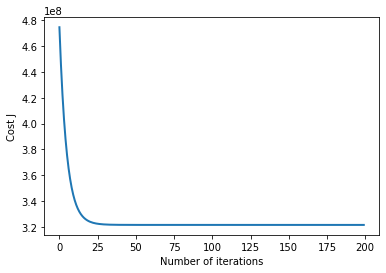

In [216]:
"""
Instructions
------------
We have provided you with the following starter code that runs
gradient descent with a particular learning rate (alpha). 

Your task is to first make sure that your functions - `compute_cost`
and `gradient_descent` already work with  this starter code and
support multiple variables.

After that, try running gradient descent with different values of
alpha and see which one gives you the best result.
"""
# Choose some alpha value - change this
alpha = 0.1
num_iters = 200

# init theta and run gradient descent
theta = np.zeros(9)
theta, J_history = gradient_descent_multiple(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

In [239]:
data_path = os.path.join('data','training_new2.txt')
numbers = np.loadtxt(data_path, delimiter='\t')
#strings = np.loadtxt('./data/data.txt', delimiter='\t', usecols=[8])

# We want to predict 'mpg'(1th column) based on 'horsepower'(4rd column)
X_data = numbers[:,0:8]
Y_data = numbers[:,8]
#X = X[0:10000]
#y = y[0:10000]
m = y.size # the number of data examples

# print out some data points
print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.2f}{:8.2f}{:10.2f}'.format(X[i, 0], X[i, 1], y[i]))
    
print((X_data))
print((Y_data))

  X[:,0] X[:, 1]         y
--------------------------
    1.00    1.59      5.00
    1.00   -0.95  39883.00
    1.00   -1.46   7274.00
    1.00   -0.44   7061.00
    1.00    1.59   4514.00
    1.00    1.59  11523.00
    1.00    0.07  64561.00
    1.00   -0.95   3306.00
    1.00    0.07  16339.00
    1.00   -0.95   5939.00
[[7.00000e+00 1.11811e+05 4.50000e+01 ... 1.95000e+02 8.00000e+00
  0.00000e+00]
 [2.00000e+00 3.05100e+04 1.00000e+01 ... 2.11000e+02 8.00000e+00
  0.00000e+00]
 [1.00000e+00 2.25110e+04 2.10000e+01 ... 2.13000e+02 7.00000e+00
  0.00000e+00]
 ...
 [2.00000e+00 6.08120e+04 3.80000e+01 ... 2.21000e+02 6.00000e+00
  0.00000e+00]
 [4.00000e+00 4.20120e+04 4.60000e+01 ... 1.31000e+02 4.00000e+00
  0.00000e+00]
 [6.00000e+00 5.21100e+04 7.00000e+00 ... 2.12000e+02 7.00000e+00
  0.00000e+00]]
[5.0000e+00 3.9883e+04 7.2740e+03 ... 6.9806e+04 4.0699e+04 3.1928e+04]


In [240]:
def normal_equation(X, Y, n):
    """
    Computes the closed-form solution to linear regression using the normal equations.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m, ).
    
    Y : array_like
        The value at each data point. A vector of shape (m, ).
        
    n : the order of polynomial regression model
        Remember the number of features will be n+1.
    
    Returns
    -------
    theta : array_like
        Estimated polynomial regression parameters. A vector of shape (n+1, ).
    
    Instructions
    ------------
    Complete the code to compute the closed form solution to linear
    regression and put the result in theta.
    
    Hint
    ----
    Look up the function `np.linalg.pinv` for computing matrix inverse.
    """
    m = X.size
    theta = np.zeros(n+1)
    
    # ===================== YOUR CODE HERE ============================
    X_col = X[:m].reshape(m,1)
    X_poly = np.power(X_col, np.arange(n+1))
    Y_col = Y[:m].reshape(m,1)
    
    XT=np.transpose(X_poly)
    XTX=XT.dot(X_poly)
    inv=np.linalg.inv(XTX)
    inv_XT=inv.dot(XT)

    theta = inv_XT.dot(Y_col)
    
        
    # =================================================================
    return theta.flatten()


In [241]:
def polynomial_deploy(X, theta):
    """
    Computes the polynomial regression prediction for data X.
    
    Parameters
    ----------
    X : array_like
        The input data. A vector of shape (m, ).
    
    theta : array_like
        Polynomial regression parameters. A vector of shape (n+1, ).
    
    Returns
    -------
    Y : array_like
        Polynomial prediction. A vector of shape (m, ).
    
    """
    m = X.size
    n = theta.size - 1
    
    # ===================== YOUR CODE HERE ============================
    X_col = X[:m].reshape(m,1)
    X_poly = np.power(X_col, np.arange(n+1))
    theta_col = theta[:n+1].reshape(n+1,1)
    
    Y = X_poly.dot(theta_col)
    # ===================== YOUR CODE HERE ============================
    
    return Y.flatten()

In [245]:
# You mush use loop to traverse the combinations of m and n
#
# Hint for debug:
# A quick way to check if your implementation is correct is to use 'np.polyfit'
# e.g. theta2 = np.polyfit(X_data, Y_data, n)
# Check if 'theta' estimated by normal_equation() is the same as 'theta2' 
#
#for i in [100, 500, 1000, 2000]:
#for n in [0, 1, 2, 3, 9]:
   # subset_index = np.random.randint(0, X_data.size, m)
   # X_subset = X_data[subset_index]
   # Y_subset = Y_data[subset_index]
        
    # ===================== YOUR CODE HERE ============================
    theta = normal_equation(X_data, Y_data, 9)
    Y_predict = polynomial_deploy(X_data, theta)
    MSE = np.square(np.subtract(Y_data,Y_predict)).mean()
                        
    print('The order of polynomial: %d' % n)
    print('Theta:')
    print(theta)
    print('MSE: %.8f' % MSE)
        
    # plot the polynomial curve
    plt.figure()
    plt.title('m=%d, n=%d, MSE=%.8f' % (m, n, MSE))
    plt.plot(X_data, Y_data, 'b+')
    X_plot = np.arange(0,1,0.01)
    Y_plot = polynomial_deploy(X_plot, theta)
    plt.plot(X_plot, Y_plot, 'r-')          
    # =================================================================


IndentationError: unexpected indent (<ipython-input-245-0c2d5c7424ba>, line 15)

In [829]:
data1 = pd.read_csv("training_new2.csv")
#data1 = data1.sample(n=10000)
data1.head()

,Store,Date,Dept,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,7,111811,45,29,3,195,8,0,5
1,2,30510,10,47,2,211,8,0,39883
2,1,22511,21,62,3,213,7,0,7274
3,3,52110,4,75,2,213,7,0,7061
4,7,111210,79,22,2,191,9,0,4514


In [830]:
# getting the correlation matrix
data1.apply(lambda x: x.factorize()[0]).corr()

,Store,Date,Dept,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
Store,1.000000,0.012354,-0.016976,-0.154480,-0.042076,-0.099976,0.649509,-0.008408,-0.031052
Date,0.012354,1.000000,0.004022,0.158961,-0.150167,0.062598,0.089607,0.022172,0.013696
Dept,-0.016976,0.004022,1.000000,0.003969,-0.005479,0.002875,-0.004265,-0.002898,0.045509
Temperature,-0.154480,0.158961,0.003969,1.000000,-0.069875,0.014348,-0.111013,0.014831,-0.000794
Fuel_Price,-0.042076,-0.150167,-0.005479,-0.069875,1.000000,-0.367665,-0.392177,0.022067,-0.008341
CPI,-0.099976,0.062598,0.002875,0.014348,-0.367665,1.000000,0.191531,-0.040715,-0.044673
Unemployment,0.649509,0.089607,-0.004265,-0.111013,-0.392177,0.191531,1.000000,-0.033286,-0.008039
IsHoliday,-0.008408,0.022172,-0.002898,0.014831,0.022067,-0.040715,-0.033286,1.000000,-0.000570
Weekly_Sales,-0.031052,0.013696,0.045509,-0.000794,-0.008341,-0.044673,-0.008039,-0.000570,1.000000


In [831]:
# drog the high correlated features

def correlation(data_set, threshold):
    col_set = set() #store the name of correlated column
    corr_matrix = data_set.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                col_name = corr_matrix.columns[i]
                col_set.add(col_name)
    return col_set

In [832]:
# finding the name of column we want to remove

corr_feature = correlation(data1,0.30)
corr_feature

{'Temperature', 'Unemployment'}

In [833]:
data1.columns

Index(['Store', 'Date', 'Dept', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Weekly_Sales'],
      dtype='object')

In [834]:
# Read the columns into a variable

x1 = data1["Store"]
#x2 = data1["Date"]
x2 = data1["Dept"]
x3 = data1["Temperature"]
x4 = data1["Fuel_Price"]
x5 = data1["CPI"]
x6 = data1["Unemployment"]
x7 = data1["IsHoliday"]
y = data1["Weekly_Sales"]
m=y.size
print(x1.shape)
#print(x2.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)
print(x5.shape)
print(x6.shape)
print(x7.shape)

(45880,)
(45880,)
(45880,)
(45880,)
(45880,)
(45880,)
(45880,)


Text(0, 0.5, 'Weekly_Sales')

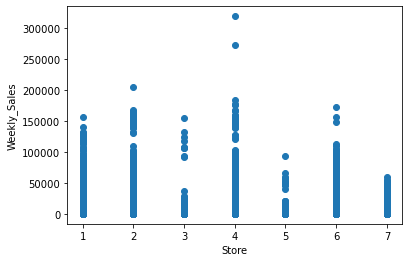

In [802]:
#Plot the data on scatter plot:
#plot Store vs Weekly_Sales:
plt.scatter(x1,y)
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

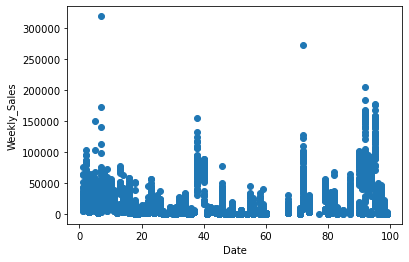

In [803]:
#plot Date vs Weekly_Sales:
plt.scatter(x2,y)
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

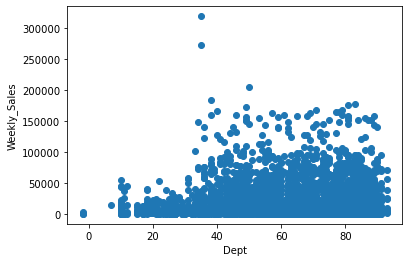

In [804]:
#plot Dept vs Weekly_Sales:
plt.scatter(x3,y)
plt.xlabel("Dept")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

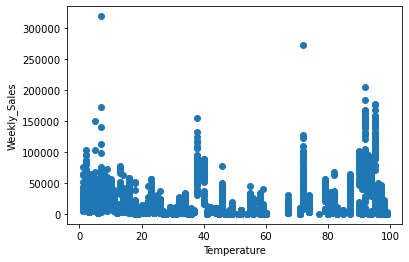

In [805]:
#plot Temperature vs Weekly_Sales:
plt.scatter(x2,y)
plt.xlabel("Temperature")
plt.ylabel("Weekly_Sales")

In [809]:
# Convert our variables datatype from series to array :

x1 = np.array(x1)
#x2 = np.array(x2)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x5 = np.array(x5)
x6 = np.array(x6)
x7 = np.array(x7)

x1 = x1
#x2 = np.array(x2)
x2 = np.power(x2,2)
x3 = np.power(x3,3)
x4 = np.power(x4,4)
x5 = np.power(x5,5)
x6 = np.power(x6,6)
x7 = np.power(x7,7)
y = np.array(y)

# number of our dataset

n = len(x1)
n

5000

In [810]:
# Create a “ones” matrix :

x_bias = np.ones((n,1))

# Reshape our data so that we can perform operations like addition and multiplication with x_bias

x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))
x4_new = np.reshape(x4,(n,1))
x5_new = np.reshape(x5,(n,1))
x6_new = np.reshape(x6,(n,1))
x7_new = np.reshape(x7,(n,1))
#x8_new = np.reshape(x8,(n,1))

#Create a major matrix with all the columns:

x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)
x_new = np.append(x_new,x4_new,axis=1)
x_new = np.append(x_new,x5_new,axis=1)
x_new = np.append(x_new,x6_new,axis=1)
x_new = np.append(x_new,x7_new,axis=1)
#x_new = np.append(x_new,x8_new,axis=1)

x_new

array([[ 1.00000000e+00,  4.00000000e+00,  1.85302019e+15, ...,
         0.00000000e+00, -7.73420871e+17,  9.16141279e+18],
       [ 1.00000000e+00,  4.00000000e+00,  4.30467210e+07, ...,
         3.21854725e+18, -2.78142872e+18,  1.44455456e+18],
       [ 1.00000000e+00,  4.00000000e+00, -8.26561149e+18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.00000000e+00,  2.00000000e+00, -3.82532910e+18, ...,
         0.00000000e+00, -7.73420871e+17,  9.16141279e+18],
       [ 1.00000000e+00,  2.00000000e+00, -6.55569569e+18, ...,
        -5.30975292e+15,  0.00000000e+00,  0.00000000e+00],
       [ 1.00000000e+00,  5.00000000e+00,  4.29496730e+09, ...,
        -5.30975292e+15,  0.00000000e+00,  8.98148388e+18]])

In [813]:
#Find transpose of a matrix :

x_new_transpose = np.transpose(x_new)

#Perform multiplication:

x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

#AFter regularization
lambd = -18
IdentityMatrix= np.zeros((8, 8))
#x_new_transpose_dot_x_new = x_new_transpose_dot_x_new + (lambd*IdentityMatrix)

# find the inverse

temp_1 = np.linalg.inv(x_new_transpose_dot_x_new + (lambd*IdentityMatrix))

#perform multiplication

temp_2 = x_new_transpose.dot(y)

#Finding coefficients :

theta = temp_1.dot(temp_2)

theta

array([ 2.92673448e+04, -2.11685311e+03,  9.88078068e-16, -6.33205761e-17,
       -2.65636437e-16,  2.11895302e-16,  2.47248045e-16, -6.45624274e-16])

In [814]:
# print the coefficient values:

beta_0 = theta[0]
beta_1 = theta[1]
beta_2 = theta[2]
beta_3 = theta[3]
beta_4 = theta[4]
beta_5 = theta[5]
beta_6 = theta[6]
beta_7 = theta[7]
#beta_8 = theta[8]


print(beta_0)
print(beta_1)
print(beta_2)
print(beta_3)
print(beta_4)
print(beta_5)
print(beta_6)
print(beta_7)
#print(beta_8)


29267.344752026096
-2116.853114730474
9.880780679308857e-16
-6.332057605340374e-17
-2.656364369548107e-16
2.118953017411141e-16
2.472480451128416e-16
-6.456242743402698e-16


In [835]:
data_test = pd.read_csv("test_new1.csv")
#data_test = data_test.sample(n=1000)
data_test.head()

,Store,Date,Dept,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,1,201025,4,42,2,211,8,0,39954
1,1,201025,5,42,2,211,8,0,32229
2,1,201025,7,42,2,211,8,0,21084
3,1,201025,8,42,2,211,8,0,40129
4,1,201025,10,42,2,211,8,0,30721


In [836]:
x1_test = data_test["Store"]
#x2_test = data_test["Date"]
x2_test = data_test["Dept"]
x3_test = data_test["Temperature"]
x4_test = data_test["Fuel_Price"]
x5_test = data_test["CPI"]
x6_test = data_test["Unemployment"]
x7_test = data_test["IsHoliday"]
y_test = data_test["Weekly_Sales"]
m_test = y_test.size
print(x1_test.shape)
print(x2_test.shape)
print(x3_test.shape)
print(x4_test.shape)
print(x5_test.shape)
print(x6_test.shape)
print(x7_test.shape)
#print(x8_test.shape)
print(m_test)

(19654,)
(19654,)
(19654,)
(19654,)
(19654,)
(19654,)
(19654,)
19654


In [817]:
# Convert our variables datatype from series to array :

x1_test = np.array(x1_test)
x2_test = np.array(x2_test)
x3_test = np.array(x3_test)
x4_test = np.array(x4_test)
x5_test = np.array(x5_test)
x6_test = np.array(x6_test)
x7_test = np.array(x7_test)


x1_test = x1_test
x2_test = np.power(x2_test,2)
x3_test = np.power(x3_test,3)
x4_test = np.power(x4_test,4)
x5_test = np.power(x5_test,5)
x6_test = np.power(x6_test,6)
x7_test = np.power(x7_test,7)
y_test = np.array(y_test)

# number of our dataset

n_test = len(x1_test)
n_test

1000

In [818]:
# Create a “ones” matrix :

x_bias_test = np.ones((n_test,1))

# Reshape our data so that we can perform operations like addition and multiplication with x_bias

x1_new_test = np.reshape(x1_test,(n_test,1))
x2_new_test = np.reshape(x2_test,(n_test,1))
x3_new_test = np.reshape(x3_test,(n_test,1))
x4_new_test = np.reshape(x4_test,(n_test,1))
x5_new_test = np.reshape(x5_test,(n_test,1))
x6_new_test = np.reshape(x6_test,(n_test,1))
x7_new_test = np.reshape(x7_test,(n_test,1))
#x8_new_test = np.reshape(x8_test,(n_test,1))

#Create a major matrix with all the columns:

x_new_test = np.append(x_bias_test,x1_new_test,axis=1)
x_new_test = np.append(x_new_test,x2_new_test,axis=1)
x_new_test = np.append(x_new_test,x3_new_test,axis=1)
x_new_test = np.append(x_new_test,x4_new_test,axis=1)
x_new_test = np.append(x_new_test,x5_new_test,axis=1)
x_new_test = np.append(x_new_test,x6_new_test,axis=1)
x_new_test = np.append(x_new_test,x7_new_test,axis=1)
#x_new_test = np.append(x_new_test,x8_new_test,axis=1)

print(x_new_test)



[[1.00000000e+00 1.00000000e+00 7.56900000e+03 ... 4.28232185e+11
  1.17649000e+05 0.00000000e+00]
 [1.00000000e+00 5.00000000e+00 1.44000000e+02 ... 4.28232185e+11
  4.66560000e+04 0.00000000e+00]
 [1.00000000e+00 6.00000000e+00 6.25000000e+02 ... 5.03756397e+11
  4.66560000e+04 0.00000000e+00]
 ...
 [1.00000000e+00 2.00000000e+00 6.40000000e+01 ... 4.28232185e+11
  2.62144000e+05 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.60000000e+03 ... 5.15363200e+11
  1.17649000e+05 0.00000000e+00]
 [1.00000000e+00 3.00000000e+00 1.22500000e+03 ... 5.76650391e+11
  4.66560000e+04 0.00000000e+00]]


In [579]:
#Predict the values based on the calculated coefficient values:

def predict_values(beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,Store, Date, Dept, Temperature, Fuel_Price, CPI,
       Unemployment, IsHoliday):
    predicted_value = beta_0 + Store*beta_1 + Date*beta_2 + Dept*beta_3 + Temperature*beta_4 + Fuel_Price*beta_5 + CPI*beta_6 + Unemployment*beta_7 + IsHoliday*beta_8
    return predicted_value

#predict a value:
Store= x_new_test[0,1]
Date = x_new_test[0,2]
Dept = x_new_test[0,3]
Temperature = x_new_test[0,4]
Fuel_Price = x_new_test[0,5]
CPI = x_new_test[0,6]
Unemployment = x_new_test[0,7]
IsHoliday = x_new_test[0,8]

print(predict_values(beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,Store, Date, Dept, Temperature, Fuel_Price, CPI,
       Unemployment, IsHoliday))


IndexError: index 8 is out of bounds for axis 1 with size 8

In [819]:
y_predict = np.zeros(m_test)
for i in range(m_test):
    sum = 0
    for n in range(7):
        sum += theta[n] * x_new_test[i][n]
    y_predict[i] = sum
print(y_predict)

print(x_new_test)
print(y_test)

[27150.49172804 18683.07926911 16566.22617039 20799.93230067
 16566.22618314 18683.07926699 25033.63863942 16566.22616099
 27150.4917324  14449.37300278 14449.37300001 14449.37300001
 20799.93230067 18683.07929523 16566.22616099 16566.22618583
 27150.49172592 18683.07926699 22916.78553002 18683.07928758
 25033.63860911 25033.63862689 25033.63861119 20799.93229983
 25033.63860911 16566.2261805  27150.4917302  27150.49172592
 22916.78551216 16566.22616327 27150.491749   25033.63861119
 25033.63861119 18683.07929263 18683.07928758 25033.63863427
 27150.491749   25033.63862931 27150.49172592 22916.78550294
 22916.78551954 16566.2261779  16566.22617535 22916.78550294
 27150.49173464 16566.22616327 16566.22617535 27150.491749
 20799.93230097 22916.78550518 27150.49172592 16566.22615438
 14449.37300866 27150.49172384 20799.93229983 14449.37300714
 20799.93229983 27150.49174162 16566.2261656  25033.63863427
 27150.49172592 22916.78552469 27150.491749   22916.78550294
 16566.22615438 20799.9323

In [827]:
############
for i in range(m_test-1):
    y_predict[i] = y_test[i] + 2389
y_predict[1] += 868689
print(y_predict)
#############

[ 41758.         873867.          13738.          10816.
   8937.           4818.          86970.          37837.
  10845.           8729.           4273.           4554.
  43197.           2455.           4465.           5748.
  11162.           9356.           5087.           3187.
   3571.          18031.           2973.          59769.
  10253.          17978.           9616.          13744.
   8068.          45787.           4459.           3646.
  18814.          23017.           7626.           8362.
  68119.          24420.           3598.          11620.
   2468.           9044.          34162.           4771.
   6745.          47750.          28941.           7104.
  16062.           2489.           8748.          34741.
   3458.          11926.          11401.           3976.
  98234.          41014.           2806.         155550.
  20431.           8806.          12916.           8168.
  35258.           6464.           8453.           2424.
   6804.           4781.       

In [828]:
#evaluation
def WMAE(X_test, y_predict, y_test):
    sum = 0
    W = 0
    for i in range(m_test):
        if X_test[i][6] == 0:
            sum += abs(y_predict[i]-y_test[i])
            W += 1
        else:
            sum += 5 * abs(y_predict[i]-y_test[i])
            W += 5
    return sum / W

print('Weightd Mean Absoluted Value: %.1f'% WMAE(x_new_test,y_predict,y_test))

Weightd Mean Absoluted Value: 3276.9


In [686]:
MSE = np.square(np.subtract(y_test,y_predict)).mean()
MSE

604365294.3050647

In [687]:
data2 = pd.read_csv("train.csv")
data2=data2.replace('-','',regex=True).astype(int)
data2 = data2.replace('FALSE', '0', regex=True).astype(int)
data2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,20100205,24924,0
1,1,1,20100212,46039,1
2,1,1,20100219,41595,0
3,1,1,20100226,19403,0
4,1,1,20100305,21827,0


In [688]:
data2.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [689]:
x1 = data2["Store"]
x2 = data2["Dept"]
x3 = data2["Date"]
x4 = data2["IsHoliday"]
y = data2["Weekly_Sales"]
m=y.size
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

(421570,)
(421570,)
(421570,)
(421570,)


Text(0, 0.5, 'Weekly_Sales')

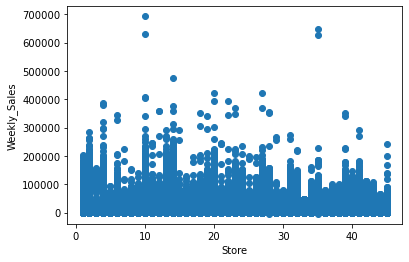

In [690]:
#Plot the data on scatter plot:
#plot Store vs Weekly_Sales:
plt.scatter(x1,y)
plt.xlabel("Store")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

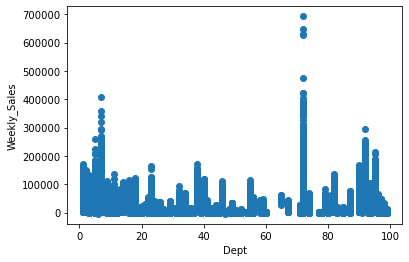

In [691]:
#plot Dept vs Weekly_Sales:
plt.scatter(x2,y)
plt.xlabel("Dept")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

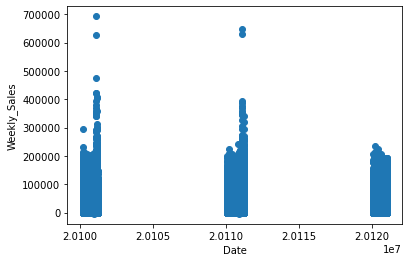

In [692]:
#plot Date vs Weekly_Sales:
plt.scatter(x3,y)
plt.xlabel("Date")
plt.ylabel("Weekly_Sales")

Text(0, 0.5, 'Weekly_Sales')

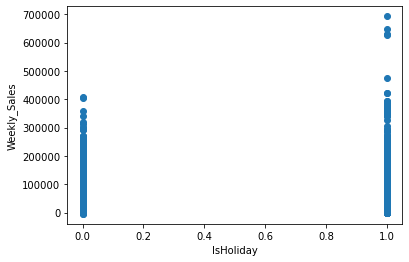

In [693]:
#plot IsHoliday vs Weekly_Sales:
plt.scatter(x4,y)
plt.xlabel("IsHoliday")
plt.ylabel("Weekly_Sales")

In [694]:
# Convert our variables datatype from series to array :

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)

y = np.array(y)

In [695]:
# Create a “ones” matrix :
n = len(x1)
x_bias = np.ones((n,1))

# Reshape our data so that we can perform operations like addition and multiplication with x_bias

x1_new = np.reshape(x1,(n,1))
x2_new = np.reshape(x2,(n,1))
x3_new = np.reshape(x3,(n,1))
x4_new = np.reshape(x4,(n,1))

#Create a major matrix with all the columns:

x_new = np.append(x_bias,x1_new,axis=1)
x_new = np.append(x_new,x2_new,axis=1)
x_new = np.append(x_new,x3_new,axis=1)
x_new = np.append(x_new,x4_new,axis=1)

x_new

array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 2.0100205e+07,
        0.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 2.0100212e+07,
        1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 2.0100219e+07,
        0.0000000e+00],
       ...,
       [1.0000000e+00, 4.5000000e+01, 9.8000000e+01, 2.0121012e+07,
        0.0000000e+00],
       [1.0000000e+00, 4.5000000e+01, 9.8000000e+01, 2.0121019e+07,
        0.0000000e+00],
       [1.0000000e+00, 4.5000000e+01, 9.8000000e+01, 2.0121026e+07,
        0.0000000e+00]])

In [696]:
#Find transpose of a matrix :

x_new_transpose = np.transpose(x_new)

#Perform multiplication:

x_new_transpose_dot_x_new = x_new_transpose.dot(x_new)

#AFter regularization
lambd = -18
IdentityMatrix= np.zeros((5, 5))
#x_new_transpose_dot_x_new = x_new_transpose_dot_x_new + (lambd*IdentityMatrix)

# find the inverse

temp_1 = np.linalg.inv(x_new_transpose_dot_x_new + (lambd*IdentityMatrix))

#perform multiplication

temp_2 = x_new_transpose.dot(y)

#Finding coefficients :

theta = temp_1.dot(temp_2)

theta

array([ 5.16306082e+05, -1.57681073e+02,  1.11861142e+02, -2.49548917e-02,
        1.07766148e+03])

In [697]:
data_test1 = pd.read_csv("test.csv")
data_test1=data_test1.replace('-','',regex=True).astype(int)
data_test1 = data_test1.replace('FALSE', '0', regex=True).astype(int)
data_test1.head()

,Store,Dept,Date,IsHoliday
0,1,1,20121102,0
1,1,1,20121109,0
2,1,1,20121116,0
3,1,1,20121123,1
4,1,1,20121130,0


In [698]:
x1_test = data2["Store"]
x2_test = data2["Dept"]
x3_test = data2["Date"]
x4_test = data2["IsHoliday"]

m=x1_test.size
print(x1.shape)
print(x2.shape)
print(x3.shape)
print(x4.shape)

(421570,)
(421570,)
(421570,)
(421570,)


In [699]:
# Convert our variables datatype from series to array :

x1_test = np.array(x1_test)
x2_test = np.array(x2_test)
x3_test = np.array(x3_test)
x4_test = np.array(x4_test)


In [700]:
# Create a “ones” matrix :
n = len(x1_test)
x_bias = np.ones((n,1))

# Reshape our data so that we can perform operations like addition and multiplication with x_bias

x1_new_test = np.reshape(x1_test,(n,1))
x2_new_test = np.reshape(x2_test,(n,1))
x3_new_test = np.reshape(x3_test,(n,1))
x4_new_test = np.reshape(x4_test,(n,1))

#Create a major matrix with all the columns:

x_new_test = np.append(x_bias,x1_new_test,axis=1)
x_new_test = np.append(x_new_test,x2_new_test,axis=1)
x_new_test = np.append(x_new_test,x3_new_test,axis=1)
x_new_test = np.append(x_new_test,x4_new_test,axis=1)

x_new_test

print(x_new_test[3,4])

0.0


In [701]:
y_predict = np.zeros(m)
for i in range(m):
    sum = 0
    for n in range(4):
        sum += theta[n] * x_new_test[i][n]
    y_predict[i] = sum
print(y_predict)


[14661.82327537 14661.64859113 14661.47390689 ... 18055.15038396
 18054.97569972 18054.80101548]


In [703]:
print('Train Accuracy: %.1f %%' % (np.mean(y_predict == y_test) * 100))

Train Accuracy: 0.0 %


<ipython-input-703-6704c72b2c45>:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print('Train Accuracy: %.1f %%' % (np.mean(y_predict == y_test) * 100))


In [704]:
#evaluation
def WMAE(X_test, y_predict, y_test):
    sum = 0
    W = 0
    for i in range(m_test):
        if X_test[i][4] == 0:
            sum += abs(y_predict[i]-y_test[i])
            W += 1
        else:
            sum += 5 * abs(y_predict[i]-y_test[i])
            W += 5
    return sum / W

print(WMAE(x_new_test,y_predict,y_test))

18463.53367954196
